In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [5]:
mnist=load_digits()

In [11]:
X=mnist.data
Y=mnist.target
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


In [12]:
example=X[72]
print(Y[72])
print(X[72])

0
[ 0.  0.  1. 13. 10.  0.  0.  0.  0.  7. 16. 16. 16.  7.  0.  0.  0.  8.
 16. 13. 10. 15.  0.  0.  0.  8. 16.  2.  2. 15.  3.  0.  0.  5. 15.  2.
  0. 12.  7.  0.  0.  1. 15.  6.  2. 16.  3.  0.  0.  0. 11. 15. 13. 16.
  0.  0.  0.  0.  1. 15. 14.  8.  0.  0.]


In [13]:
img=example.reshape((8,8))

In [14]:
print(img)

[[ 0.  0.  1. 13. 10.  0.  0.  0.]
 [ 0.  7. 16. 16. 16.  7.  0.  0.]
 [ 0.  8. 16. 13. 10. 15.  0.  0.]
 [ 0.  8. 16.  2.  2. 15.  3.  0.]
 [ 0.  5. 15.  2.  0. 12.  7.  0.]
 [ 0.  1. 15.  6.  2. 16.  3.  0.]
 [ 0.  0. 11. 15. 13. 16.  0.  0.]
 [ 0.  0.  1. 15. 14.  8.  0.  0.]]


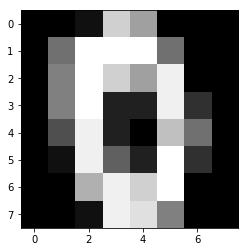

In [15]:
plt.imshow(img,cmap="gray")

In [16]:
from sklearn.datasets import load_boston

In [17]:
boston=load_boston()

In [18]:
X=boston.data
Y=boston.target
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


## Probability Distribution

(1000,)


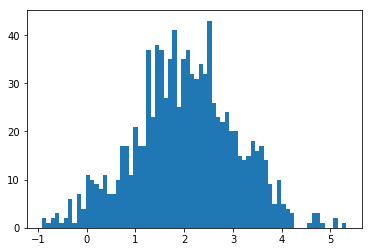

In [19]:
u=2
sigma=1
vals=u+sigma*np.random.randn(1000)
print(vals.shape)
plt.hist(vals,70)
plt.show()

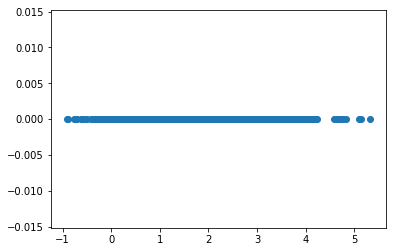

In [20]:
x=vals
y=np.zeros(x.shape)
plt.scatter(x,y)

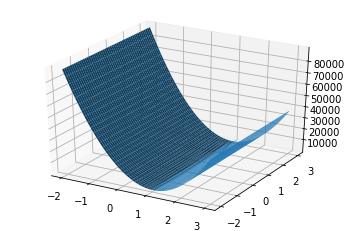

In [24]:
from mpl_toolkits.mplot3d import Axes3D
T0=np.arange(-2,3,0.01)
T1=np.arange(-2,3,0.01)
T0,T1=np.meshgrid(T0,T1)
J=np.zeros(T1.shape)
m=T0.shape[0]
n=T0.shape[1]
for i in range(m):
    for j in range (n):
        J[i,j]=np.sum(Y-T0[i,j]-T1[i,j]*X)**2
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(T0,T1,J)
plt.show()


In [25]:
import pandas as pd
dfx=pd.read_csv('./Datasets/Locally Weighted Regression/weightedX.csv')
dfy=pd.read_csv('./Datasets/Locally Weighted Regression/weightedY.csv')

x=dfx.values
y=dfy.values        
print(x.shape)
print(y.shape)

(99, 1)
(99, 1)


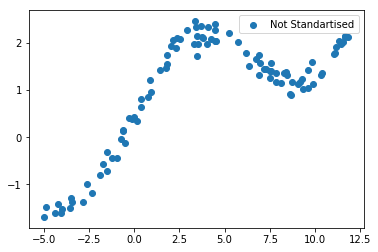

In [26]:
plt.scatter(x,y,label="Not Standartised")
X=(x-x.mean())/x.std()
Y=y

plt.legend()



plt.show()

## GRADIENT ALGORITHM

In [29]:
def hyp(x,theta):
    return theta[0]+theta[1]*x
def error(X,Y,theta):
    err=0
    m=X.shape[0]
    for i in range (m):
        hx=hyp(X[i],theta)
        err+=(hx-Y[i])**2
    return err
def grad(X,Y,theta):
    m=X.shape[0]
    grad=np.zeros((2,))
    for i in range (m):
        hx=hyp(X[i],theta)
        grad[0]+=hx-Y[i]
        grad[1]+=(hx-Y[i])*X[i]
    return grad
def gradDesc(X,Y,learning_rate=0.001,thresholderror=0.001):
    theta =np.array([-2.0,0.0])
    itr=0
    max_itr=100
    error_list=[]
    theta_list=[]
    e=error(X,Y,theta)
    while(e>=thresholderror):
        g=grad(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        theta[0]=theta[0]-learning_rate*g[0]
        theta[1]=theta[1]-learning_rate*g[1]
        theta_list.append((theta[0],theta[1]))
        
        itr+=1

    return theta,error_list,theta_list

In [30]:
finalTheta,errorL,thetaL=gradDesc(X,Y,0.001)

KeyboardInterrupt: 

In [ ]:
print(finalTheta)

In [ ]:
plt.plot(errorL)

## Visualizing Gradient Descent

In [31]:
from mpl_toolkits.mplot3d import 

T0=np.arange(-2,3,0.01)
T1=np.arange(-2,3,0.01)
T0,T1=np.meshgrid(T0,T1)
J=np.zeros(T1.shape)
thetaL=np.array(thetaL)
m=T0.shape[0]
n=T0.shape[1]
for i in range(m):
    for j in range (n):
        J[i,j]=np.sum((Y-T0[i,j]-T1[i,j]*X)**2)
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.plot_surface(T0,T1,J)
axes.scatter(thetaL[:,0],thetaL[:,1],errorL,c="Black")
plt.show()

SyntaxError: invalid syntax (<ipython-input-31-7e6deff2323d>, line 1)

NameError: name 'thetaL' is not defined

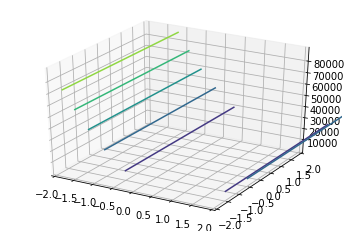

In [32]:
fig=plt.figure()
axes=fig.gca(projection='3d')
axes.contour(T0,T1,J)
axes.set_xlim([-2,2])
axes.set_ylim([-2,2])
axes.scatter(thetaL[:,0],thetaL[:,1],errorL,c="Black")
plt.show()

NameError: name 'thetaL' is not defined

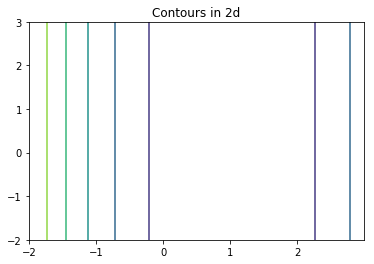

In [35]:
plt.contour(T0,T1,J)
plt.title("Contours in 2d")
plt.scatter(thetaL[:,0],thetaL[:,1],errorL)
plt.show()

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
x,y=make_regression(n_features=1,n_samples=5000,bias=4,noise=15)

In [96]:
x=x.reshape((-1,))
y=y.reshape((-1,))
print(x.shape)
print(y.shape)

(5000,)
(5000,)


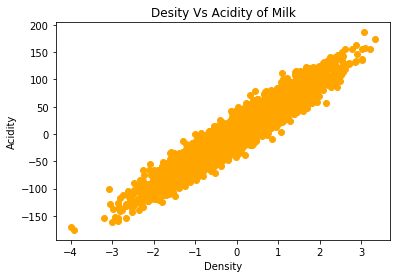

In [97]:
x=(x-x.mean())/(x.std())
X = x
Y = y
plt.scatter(X,Y,color="orange")
plt.ylabel("Acidity")  
plt.xlabel("Density")
plt.title("Desity Vs Acidity of Milk")
plt.show()


In [110]:
def hyp(x,theta):
    return theta[0]+theta[1]*x
def error(X,Y,theta):
    err=0
    m=X.shape[0]
    for i in range (m):
        hx=hyp(X[i],theta)
        err+=(Y[i]-hx)**2
    return err

def bgrad(X,Y,theta,batch_size=1):
    m=Y.shape[0]
    indices=np.arange(m)
    np.random.shuffle(indices)
    incides=indices[:batch_size]
    grad=np.zeros((2,))
    for i in indices:
        hx=hyp(X[i],theta)
        grad[0]+=hx-Y[i]
        grad[1]+=(hx-Y[i])*X[i]
    return grad

def gradDesc(X,Y,learning_rate=0.00001):
    theta =np.array([-2.0,0.0])
    itr=0
    max_itr=300
    error_list=[]
    theta_list=[]
    e=error(X,Y,theta)
    while(itr<=300):
        g=bgrad(X,Y,theta)
        e=error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0]=theta[0]-learning_rate*g[0]
        theta[1]=theta[1]-learning_rate*g[1]
        
        itr+=1

    return theta,error_list,theta_list

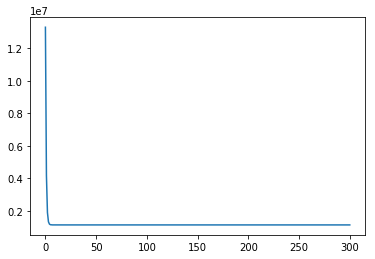

In [111]:
final_theta,error_list,theta_list=gradDesc(X,Y,0.0001)
plt.plot(error_list)

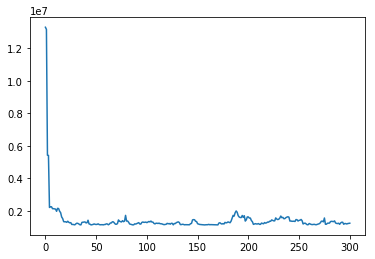

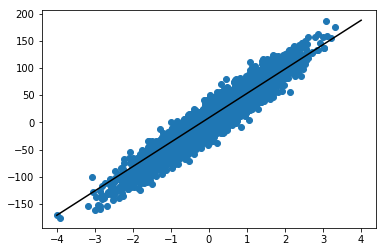

In [112]:
def hypothesis(x,theta):
    return theta[0] + theta[1]*x

def error(X,Y,theta):
    
    err = 0
    m = X.shape[0]

    for i in range(m):
        hx = hypothesis(X[i],theta)
        err += (hx - Y[i])**2
    
    return err

def gradient(X,Y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        hx = hypothesis(X[i],theta) 
        grad[0] +=  hx - Y[i]
        grad[1] += (hx - Y[i])*X[i]
        
    return grad

def batch_gradient(X,Y,theta,batch_size=1):
    m = Y.shape[0]
    indices = np.arange(m)
    np.random.shuffle(indices)
    indices = indices[:batch_size]
    grad = np.zeros((2,))
    for i in indices:
        h =  hypothesis(X[i],theta)
        grad[0] += (Y[i]-h)
        grad[1] += (Y[i]-h)*X[i]
        
    return grad


#Algorithm
def gradientDescent(X,Y,learning_rate=0.001,threshold_error = 0.001):
    theta = np.array([-2.0,0.0])
    itr = 0 
    max_itr = 300
    error_list = []
    theta_list = []
    e = error(X,Y,theta)
    while(itr <= max_itr):
        grad = batch_gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] + learning_rate*grad[0]
        theta[1] = theta[1] + learning_rate*grad[1] #doubt = +
        itr += 1
        
    return theta,error_list,theta_list


final_theta,error_list,theta_list = gradientDescent(X,Y,0.1)


plt.plot(error_list)
plt.show()



def drawLine(theta):
    x_pts = np.linspace(-4,4,10)
    y_pts = hypothesis(x_pts,theta)
    
    plt.scatter(x,y)
    plt.plot(x_pts,y_pts,color='black')
    
drawLine(final_theta)

    

    

## 

In [ ]:
from sklearn.linearmodel import LinearRegression
lr=LinearRegression(Normalization=True)
dfx=pd.read_csv('./Datasets/Locally Weighted Regression/weightedX.csv')
dfy=pd.read_csv('./Datasets/Locally Weighted Regression/weightedY.csv')

x=dfx.values
y=dfy.values 

lr.fit(x,y)